In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('FinalHW.csv')
# you need to predict average prices of Avocados in US
# every column might contain important info, its up to you to deal with it
#you MUST use a neural network and test other algorithms such as XGboost, RF or gradientBoosting Regressor etc..
# good luck
# until 23th of May

#data set name is FinalHW. csv
#predict AveragePrice

In [2]:
df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.describe()

,Unnamed: 0,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,18249.000000,18249.000000,1.824800e+04,1.824800e+04,1.824900e+04,1.824900e+04,1.824800e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506696e+05,2.930245e+05,2.951546e+05,2.283974e+04,2.396498e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453638e+06,1.265022e+06,1.204120e+06,1.074641e+05,9.862684e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083788e+04,8.544900e+02,3.008780e+03,0.000000e+00,5.087330e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073655e+05,8.646205e+03,2.906102e+04,1.849900e+02,3.974118e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.330098e+05,1.110289e+05,1.502069e+05,6.243420e+03,1.107849e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   TotalVolume   18248 non-null  float64
 4   4046          18248 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   TotalBags     18248 non-null  float64
 8   SmallBags     18249 non-null  float64
 9   LargeBags     18249 non-null  float64
 10  XLargeBags    18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
TotalVolume     1
4046            1
4225            0
4770            0
TotalBags       1
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [6]:
df = df.fillna(df.mean())

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_9144\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [7]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.drop(columns=["Date"],inplace=True)
df.head()

,Unnamed: 0,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:>

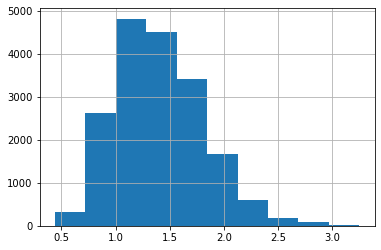

In [8]:
df.AveragePrice.hist()

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df['region'] = pd.Categorical(df['region'])
df_region = pd.get_dummies(df['region'])
df = pd.concat([df, df_region], axis=1)
df.drop('region', axis=1, inplace=True)

In [11]:
df.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
df['type']= label_encoder.fit_transform(df['type']) 
df

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
train_data = df.drop('AveragePrice', axis=1)
price = df['AveragePrice']

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = pd.DataFrame(data=scaler.transform(train_data))

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_data,price,test_size=0.2,random_state=43)

In [89]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def statistic(model):
    pred = model.predict(X_test)
    real = Y_test.values
    errors = abs(pred - real)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    mape = 100 * (errors / real)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    print('MSE ', mean_squared_error(real, pred))
    plt.figure(figsize=(25,25))
    plt.plot(real[:100])
    plt.plot(pred[:100])
    return None

In [81]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4, activation='relu', input_dim=66))
model.add(Dense(6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile('adam', loss='mean_squared_error')

In [82]:
history = model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
457/457 [==============================] - 1s 1ms/step - loss: 0.3232
Epoch 2/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0688
Epoch 3/15
457/457 [==============================] - 0s 993us/step - loss: 0.0666
Epoch 4/15
457/457 [==============================] - 0s 991us/step - loss: 0.0655
Epoch 5/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0645
Epoch 6/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0637
Epoch 7/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0627
Epoch 8/15
457/457 [==============================] - 0s 999us/step - loss: 0.0618
Epoch 9/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 10/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0608
Epoch 11/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0601
Epoch 12/15
457/457 [==============================] - 0s 1ms/step - loss: 0.0600
Epoch 13/15
457/457

Mean Absolute Error: 0.42 degrees.
Accuracy: 67.77 %.
0.06117279057237019


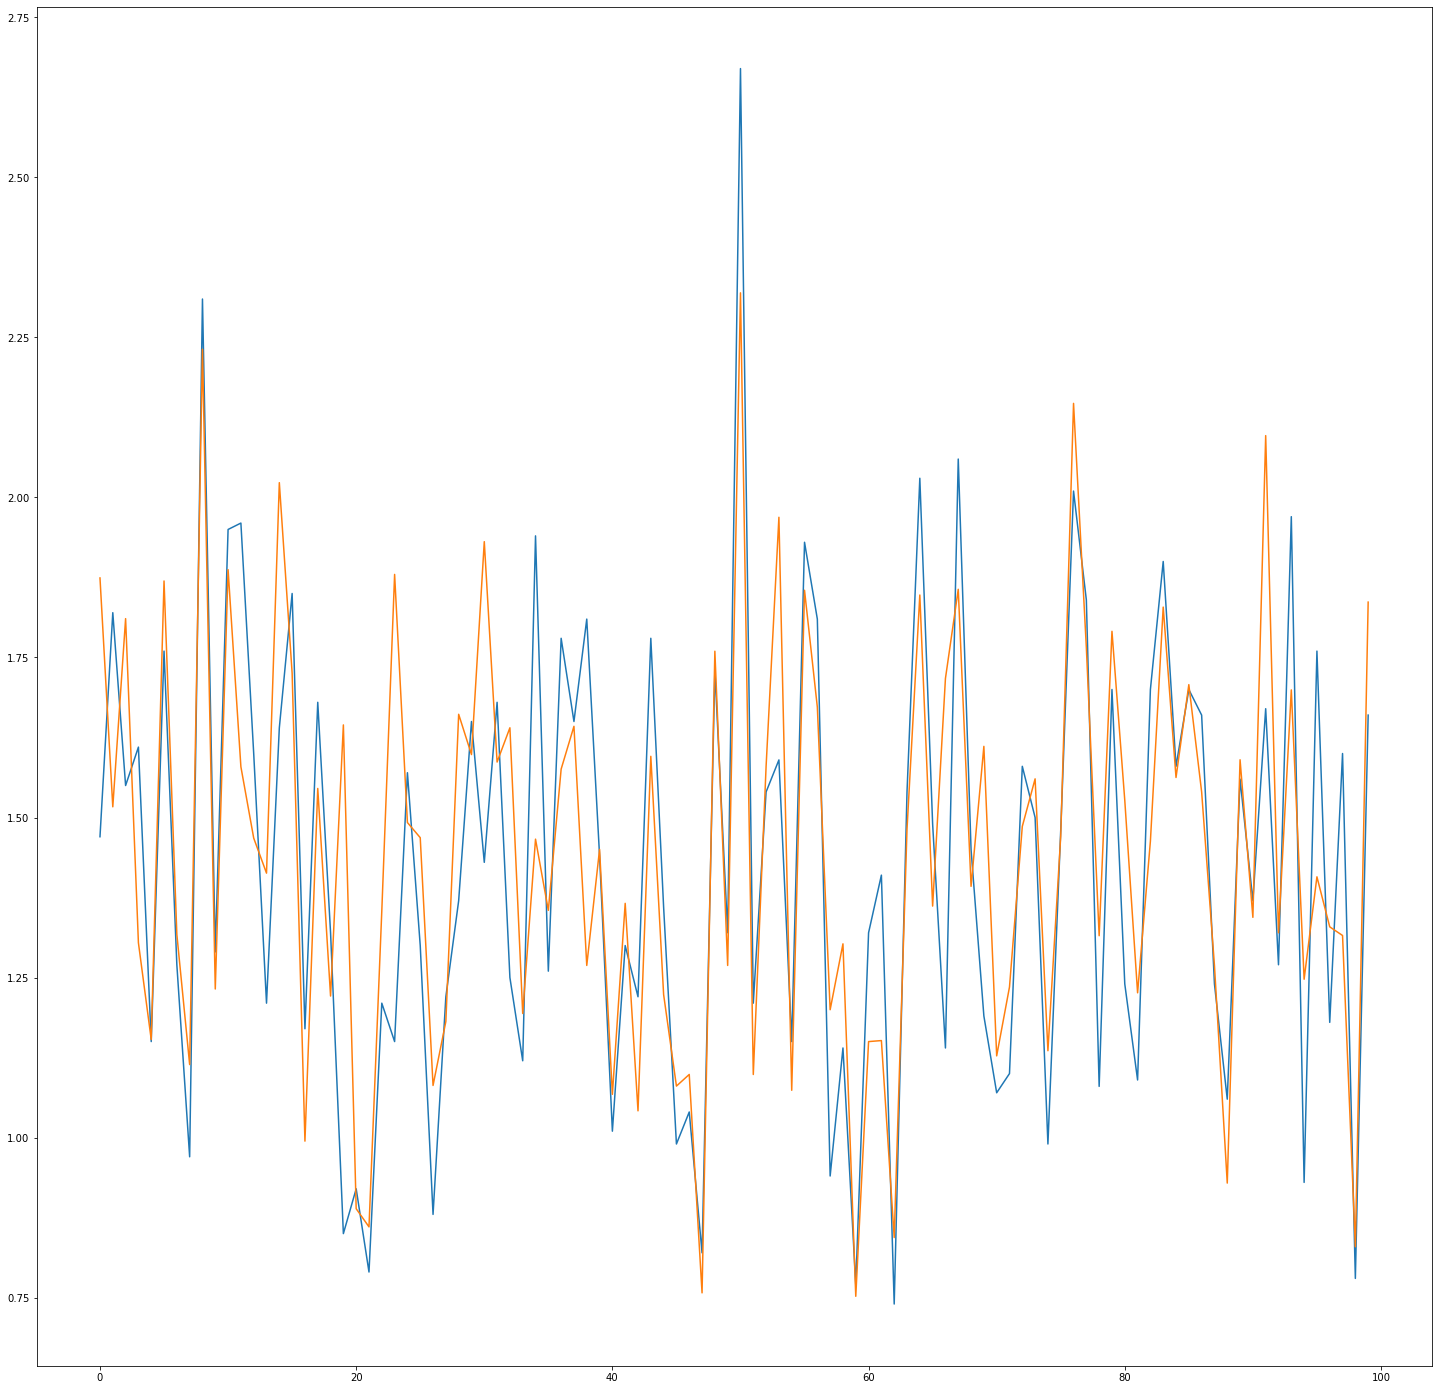

In [83]:
statistic(model)

In [84]:
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten

model2 = Sequential()
model2.add(Dense(6, activation='relu', input_dim=66))
model2.add(Dense(6, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(16, activation='elu'))
model2.add(Dense(10, activation='elu'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(4, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1))

model2.compile("adam", loss='mean_squared_error')

In [85]:
history2 = model2.fit(X_train, Y_train, epochs=20, batch_size=64)

Epoch 1/20
229/229 [==============================] - 1s 1ms/step - loss: 0.9212
Epoch 2/20
229/229 [==============================] - 0s 2ms/step - loss: 0.2351
Epoch 3/20
229/229 [==============================] - 0s 2ms/step - loss: 0.1644
Epoch 4/20
229/229 [==============================] - 0s 2ms/step - loss: 0.1428
Epoch 5/20
229/229 [==============================] - 0s 2ms/step - loss: 0.1279
Epoch 6/20
229/229 [==============================] - 0s 2ms/step - loss: 0.1166
Epoch 7/20
229/229 [==============================] - 0s 2ms/step - loss: 0.1097
Epoch 8/20
229/229 [==============================] - 0s 2ms/step - loss: 0.1020
Epoch 9/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 10/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0912
Epoch 11/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0862
Epoch 12/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 13/20
229/229 [====

Mean Absolute Error: 0.4 degrees.
Accuracy: 69.67 %.
MSE  0.07191803037664925


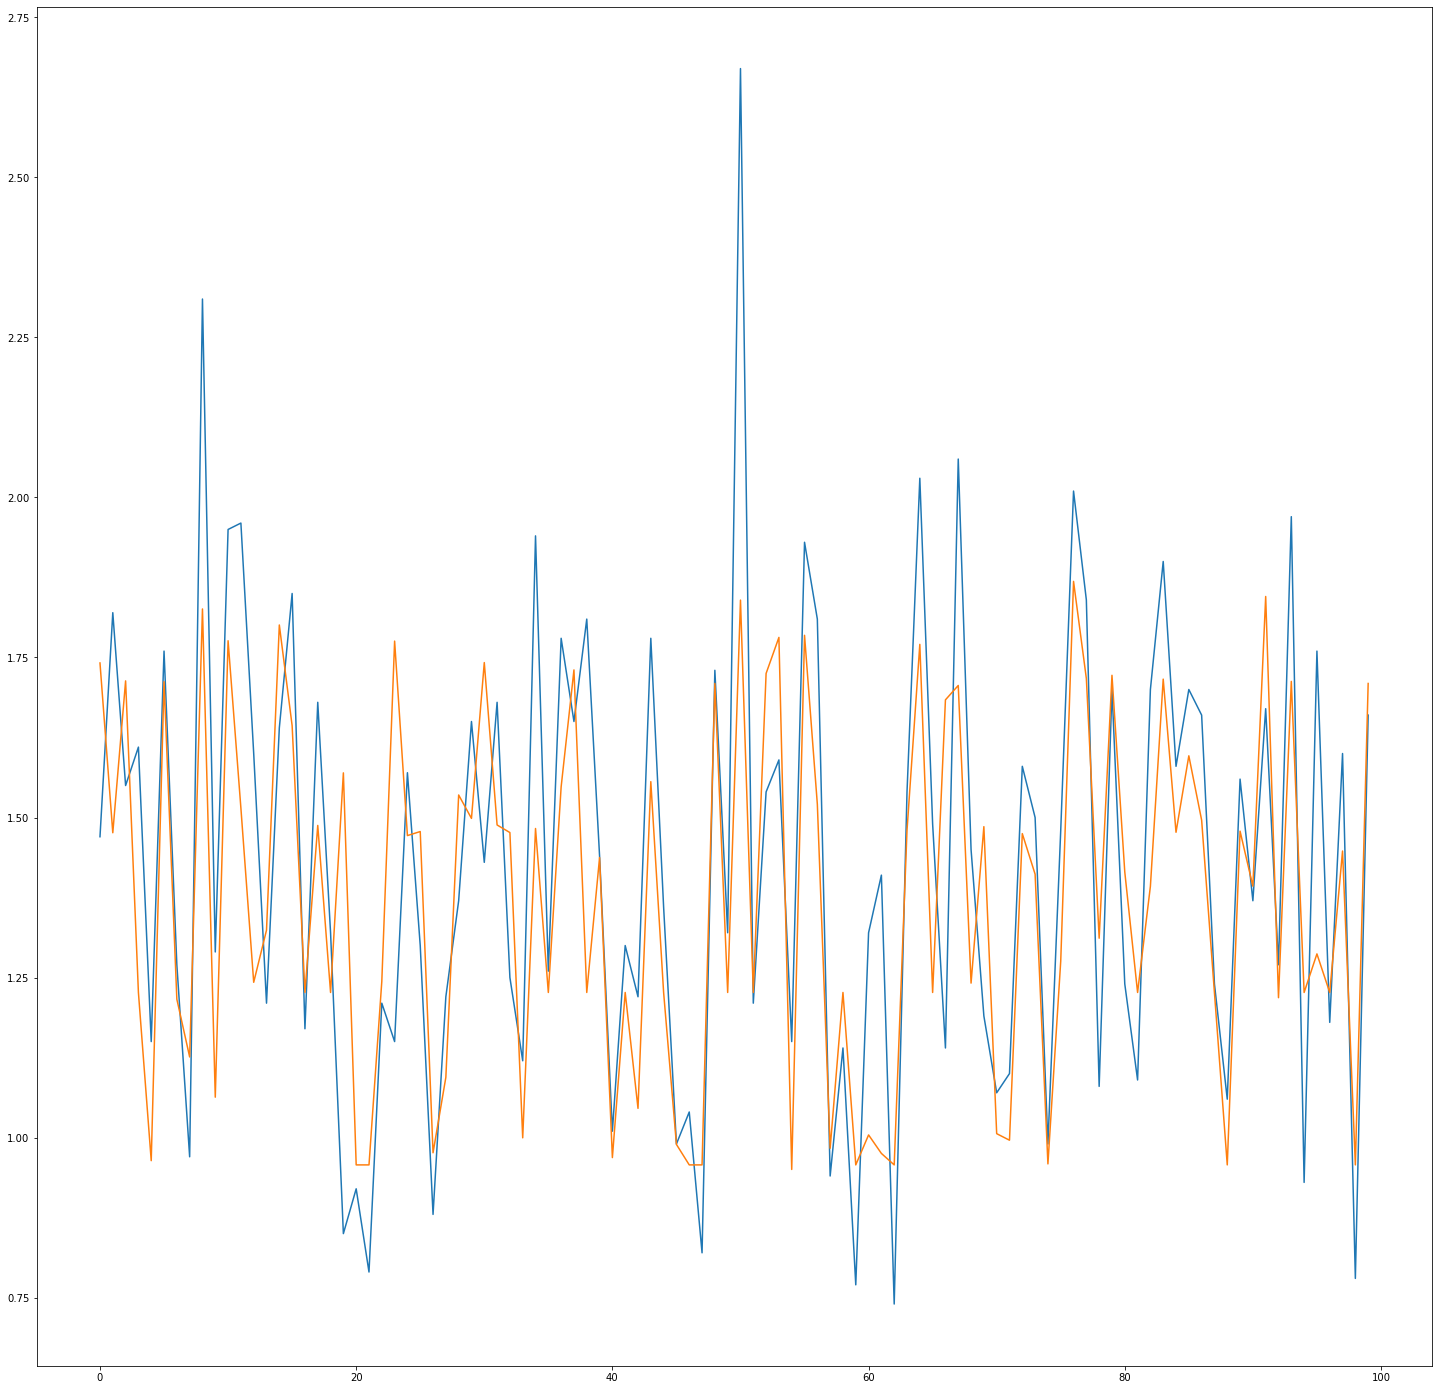

In [90]:
statistic(model2)

In [91]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Mean Absolute Error: 0.09 degrees.
Accuracy: 93.54 %.
MSE  0.01507610909997455


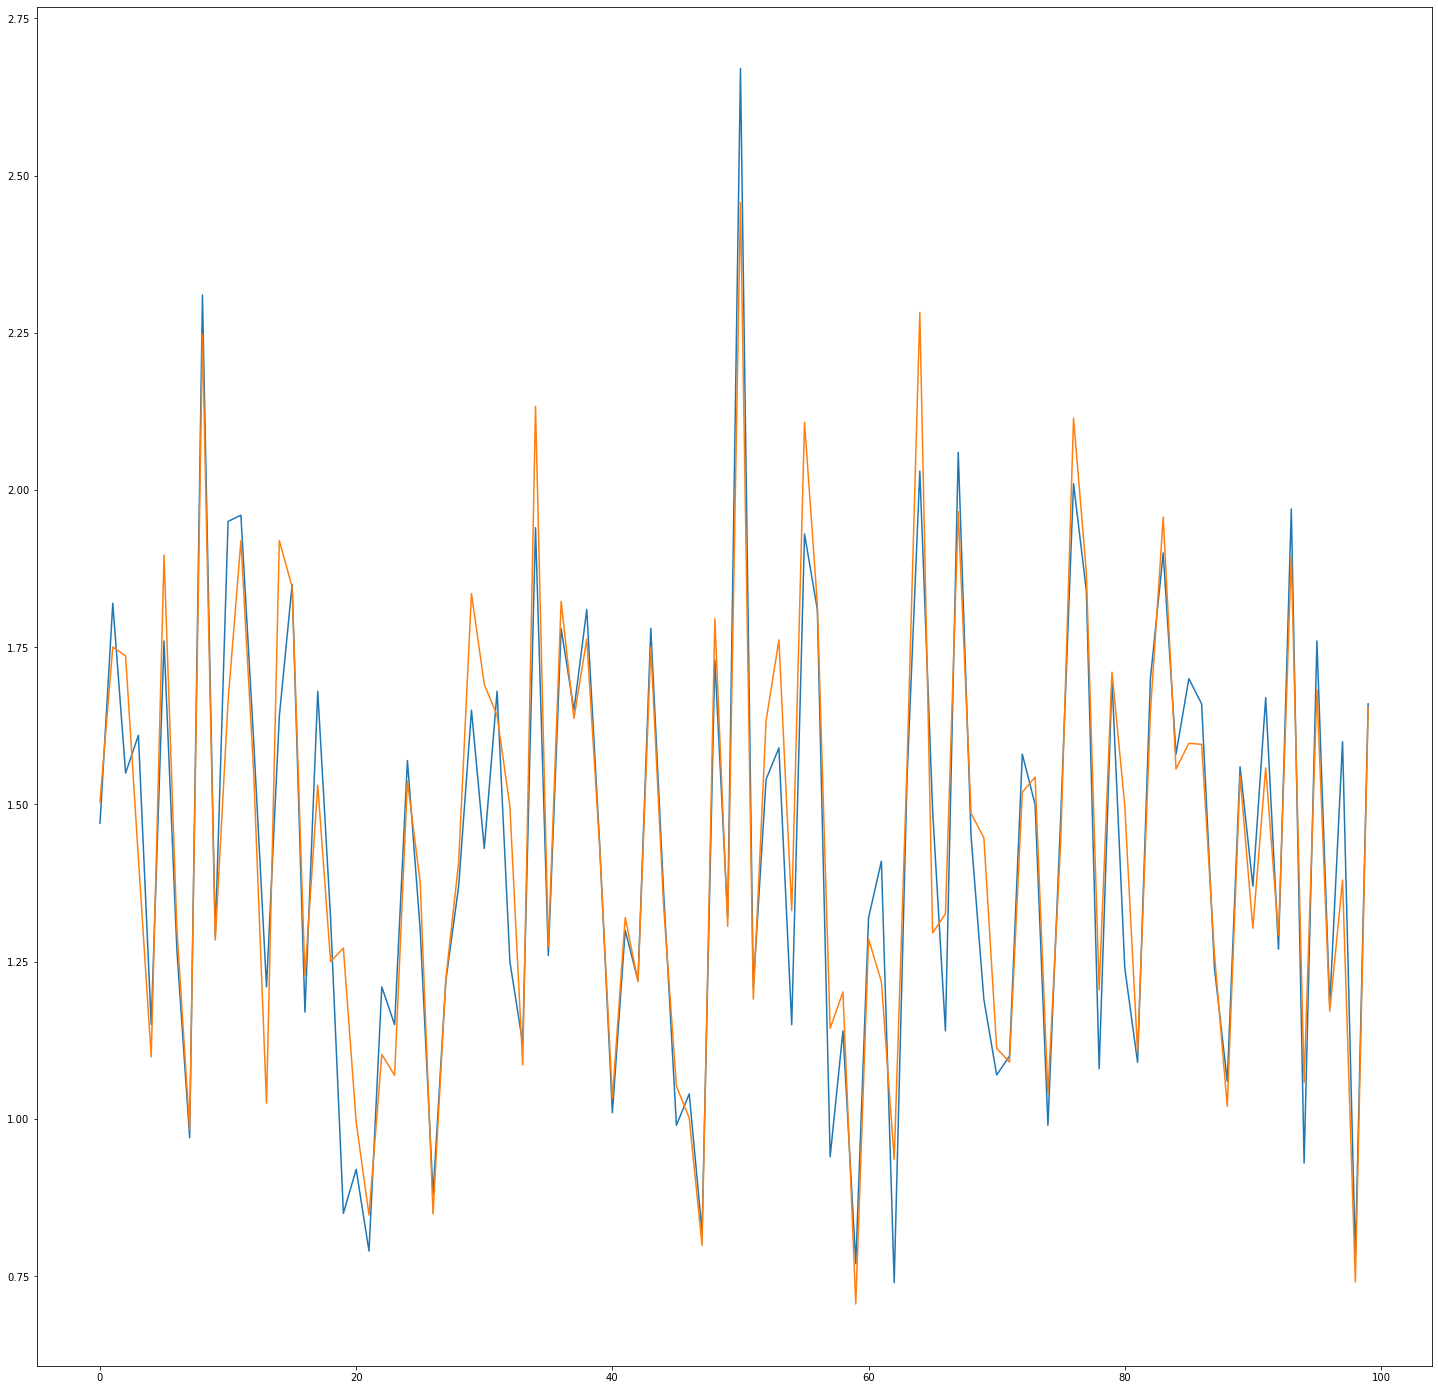

In [92]:
statistic(xgb_model)

Mean Absolute Error: 0.09 degrees.
Accuracy: 93.65 %.
MSE  0.01571451208767123


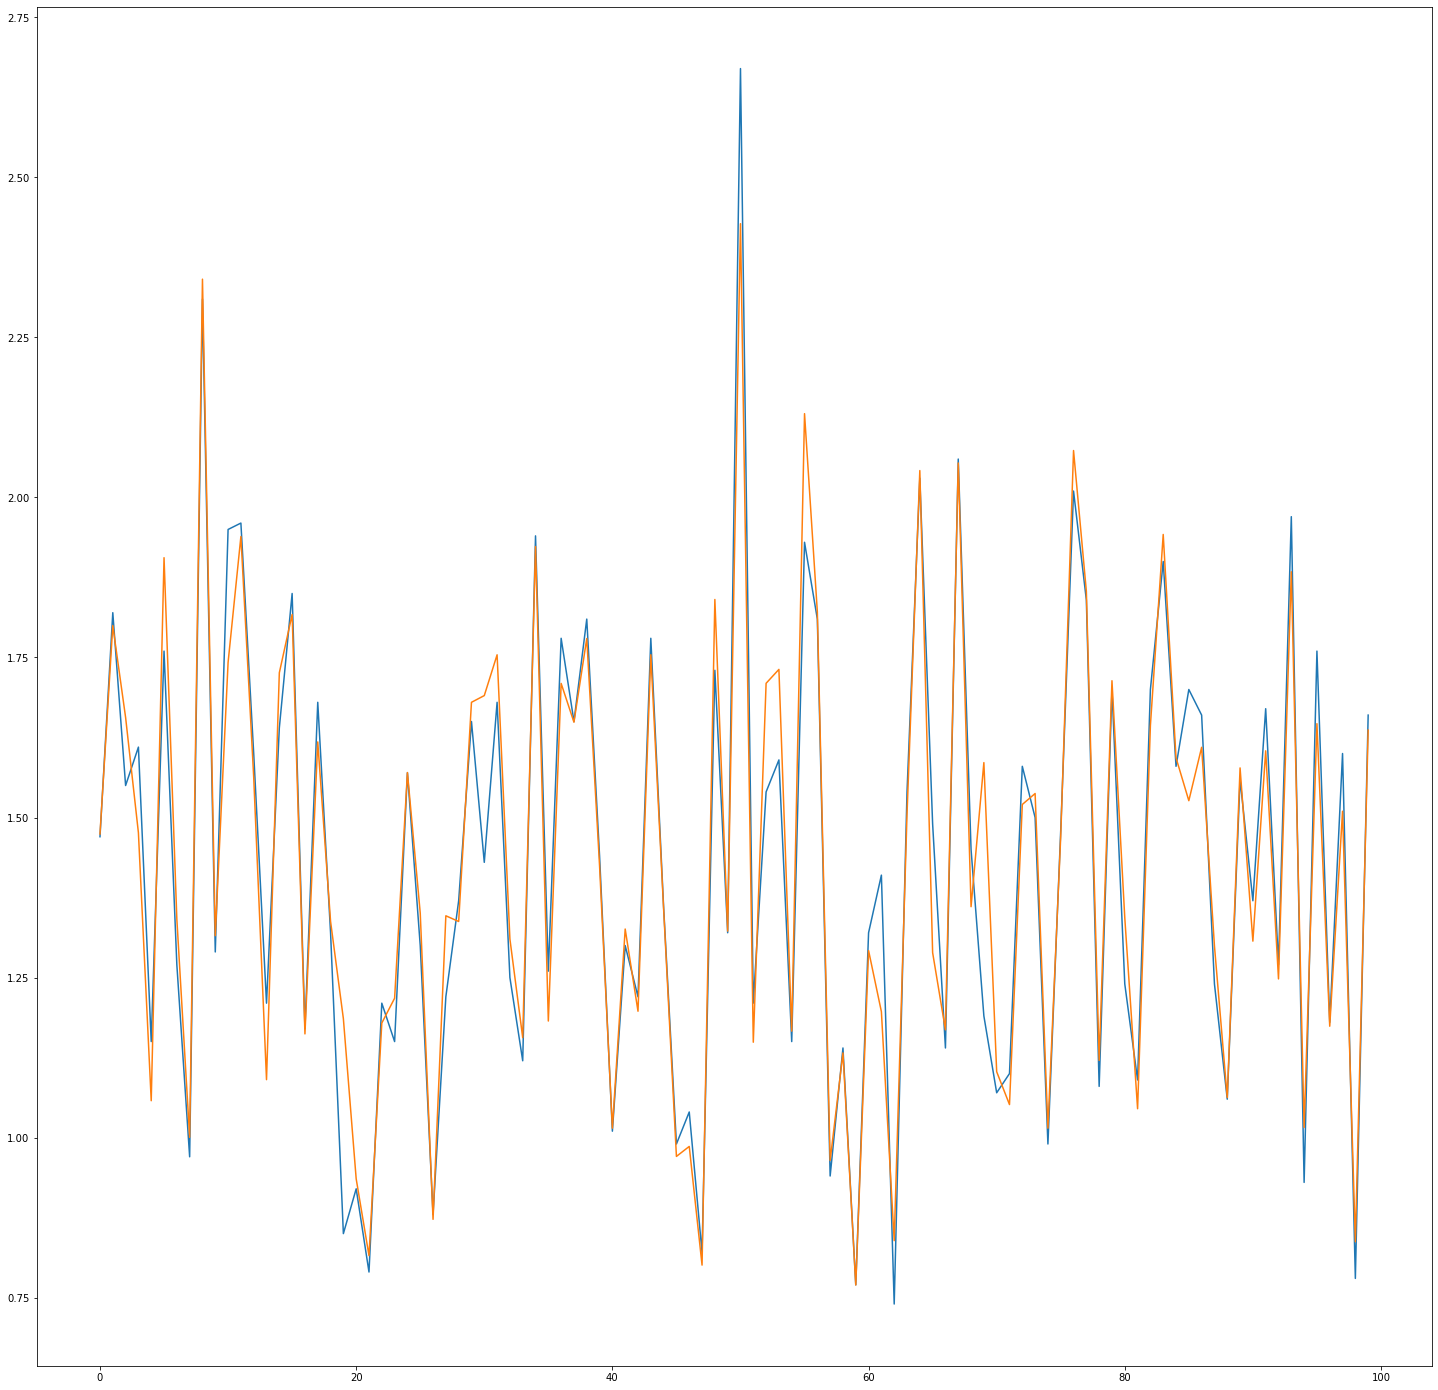

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
statistic(rf_model)

Mean Absolute Error: 0.16 degrees.
Accuracy: 88.33 %.
MSE  0.043109134041027904


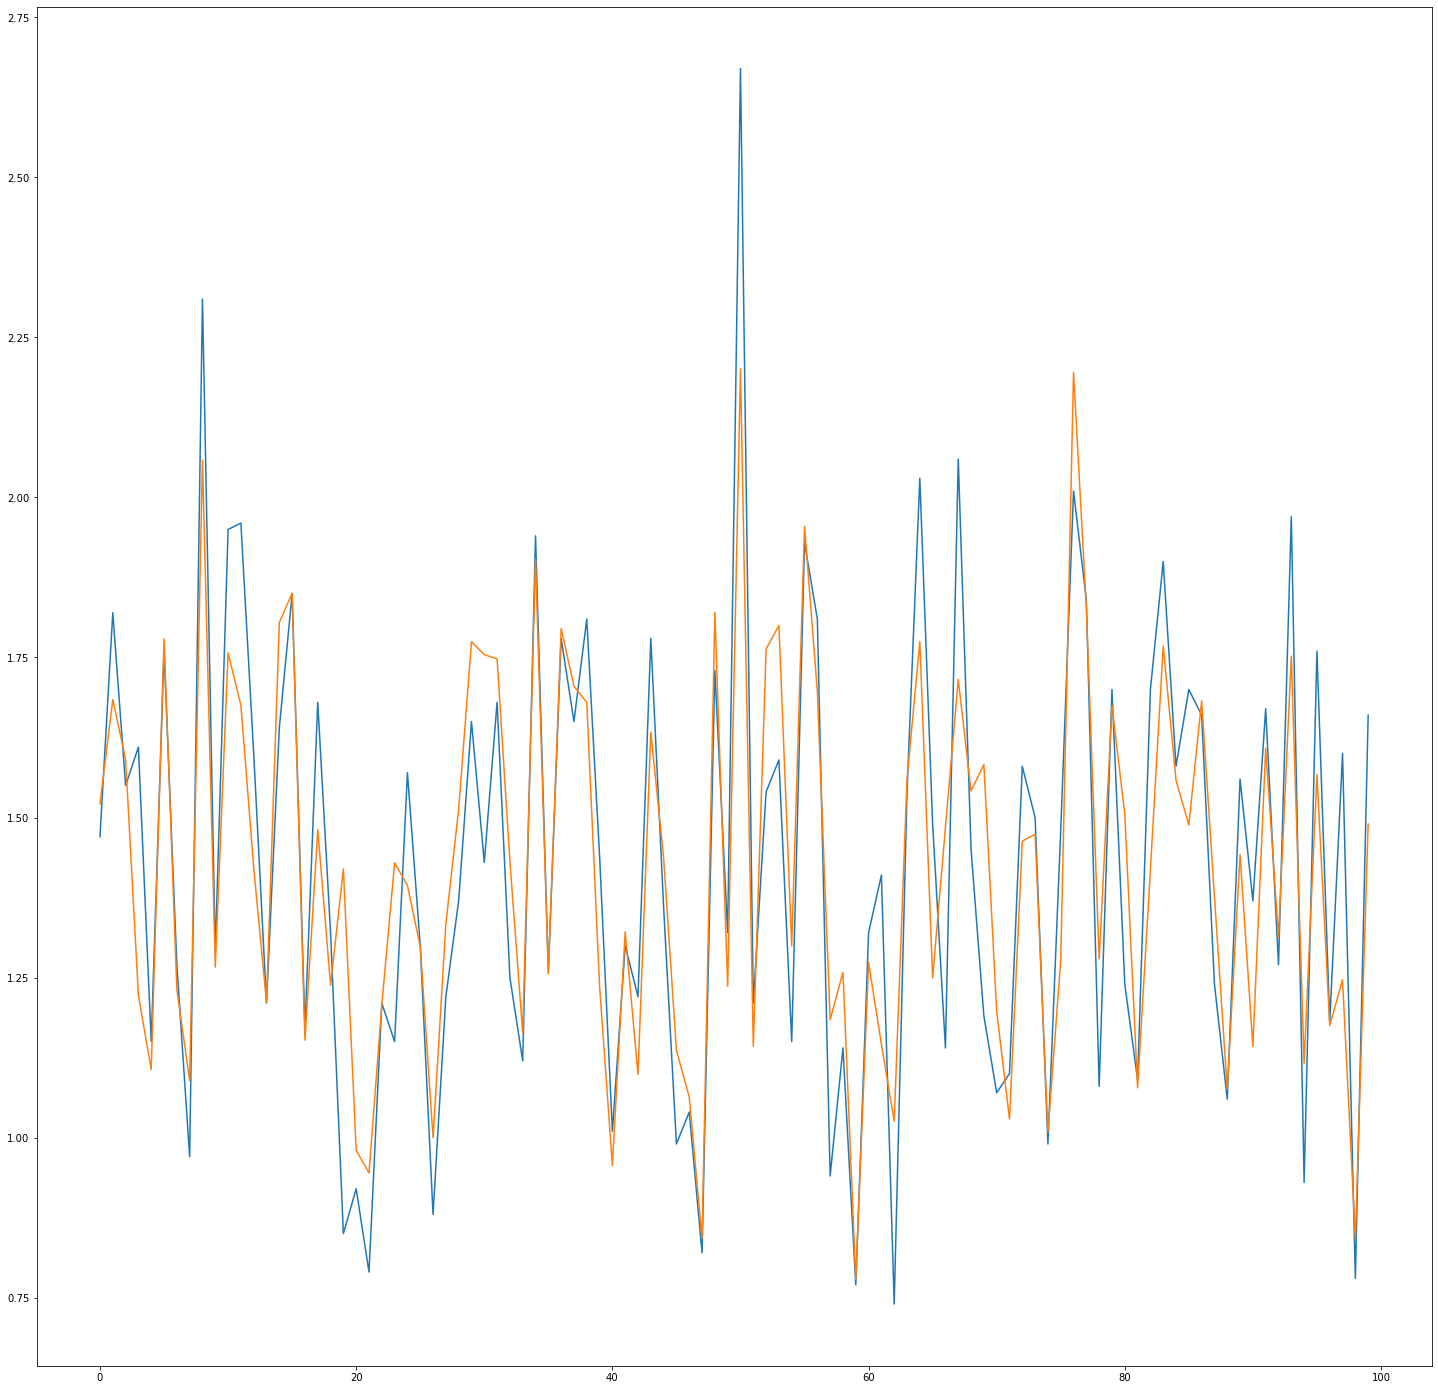

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, Y_train)
statistic(gbr_model)

Mean Absolute Error: 0.12 degrees.
Accuracy: 91.57 %.
MSE  0.032009972602739724


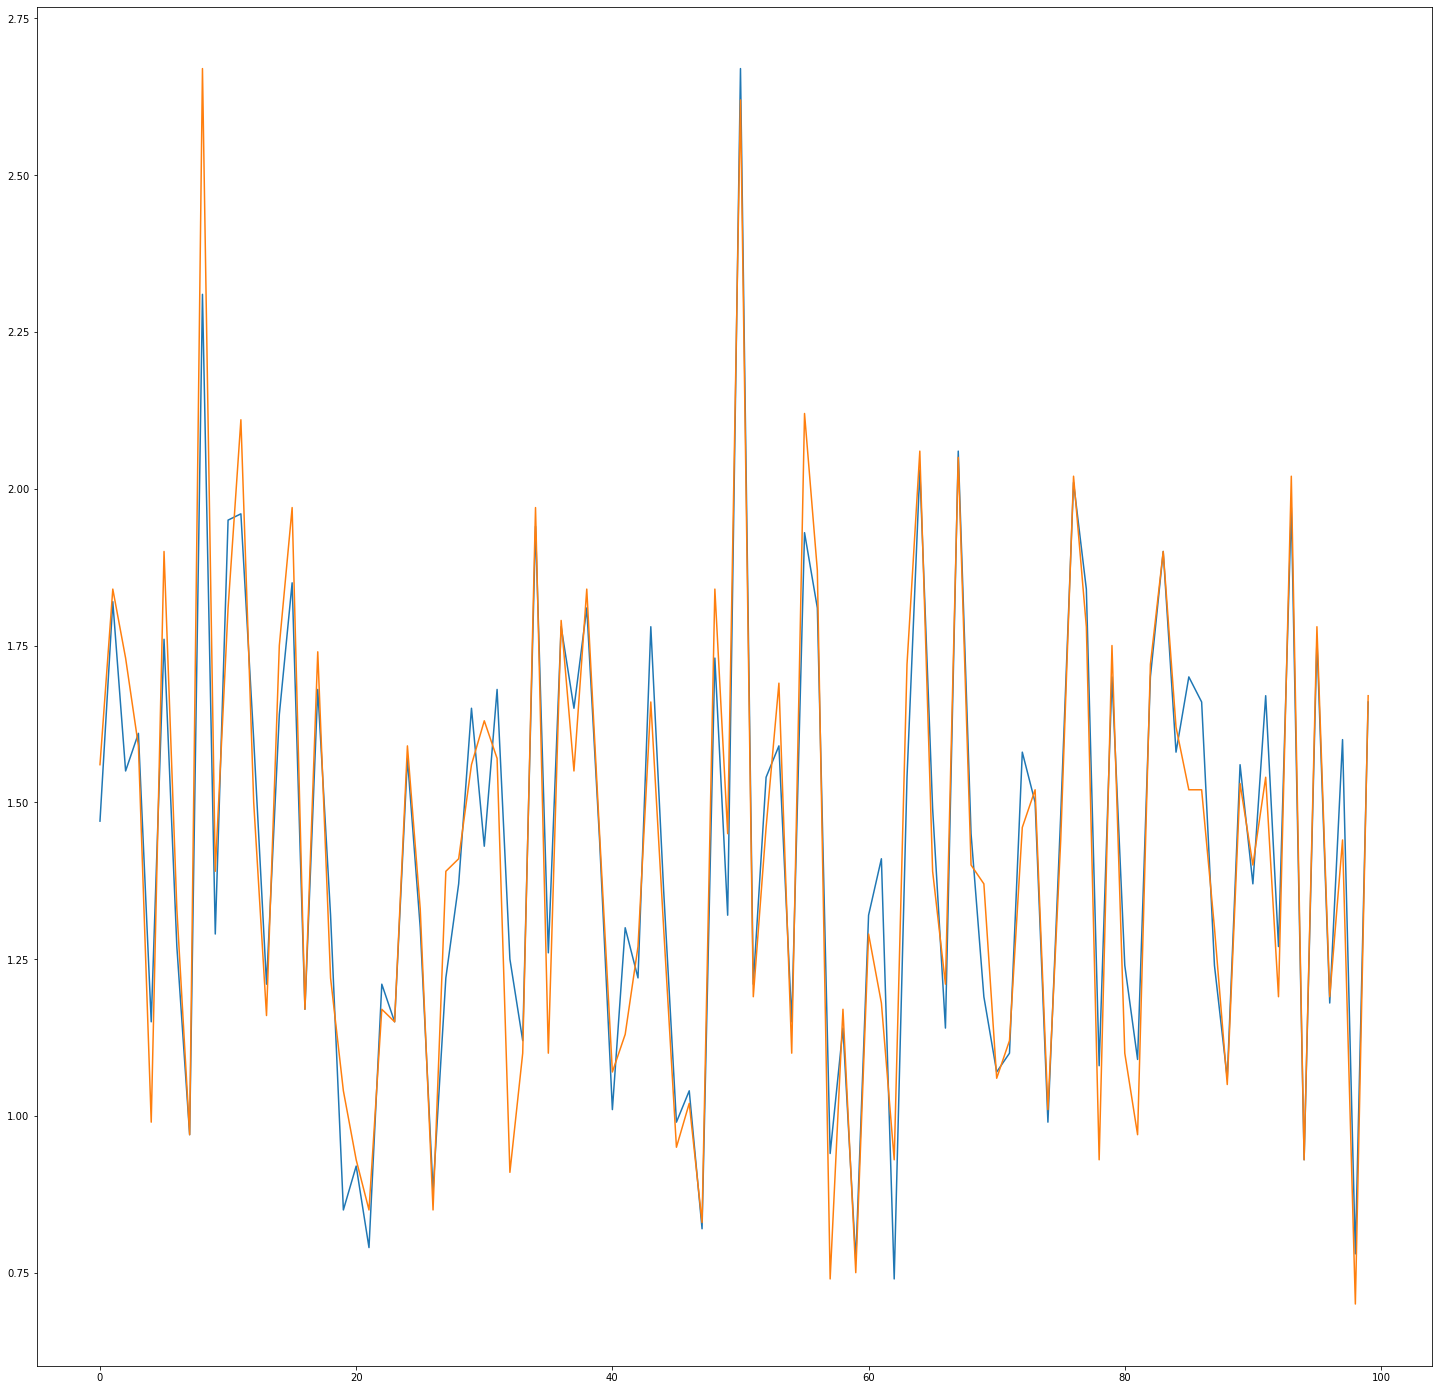

In [97]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
statistic(dt_model)

Random forest is the best model!